In [1]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [3]:
df.fillna('unavailable', inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
df['comb'] = df['author'] +" "+ df['title'] + " " + df['text']

In [6]:
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer

import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eyad3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
stemmer = PorterStemmer()
    
def clean(text):
    
    text="".join([re.sub('[^a-zA-Z]',' ',char) for char in text ])
    
    text=text.lower()
    
    text=text.split()
    
    text=[stemmer.stem(word) for word in text if word not in set(stopwords.words("english"))]
    
    text=" ".join(text)
    
    return text

In [8]:
df['comb'] = df['comb'].apply(clean)

In [9]:
df.head()

,id,title,author,text,label,comb
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucu hous dem aid even see comey letter...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,daniel j flynn flynn hillari clinton big woman...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnew com truth might get fire truth m...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss civilian kill singl us airstri...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jail fiction unpu...


In [10]:
from keras.preprocessing.text import one_hot

texts = [
    'This is an example sentence.',
    'Another sentence for demonstration purposes.',
    'Yet another sentence to encode.'
]

vocab_size = 40

encoded_texts = [one_hot(text, vocab_size) for text in texts]

for text, encoded_text in zip(texts, encoded_texts):
    print('Text:', text)
    print('Encoded:', encoded_text)

Text: This is an example sentence.
Encoded: [36, 22, 21, 34, 33]
Text: Another sentence for demonstration purposes.
Encoded: [26, 33, 12, 18, 30]
Text: Yet another sentence to encode.
Encoded: [37, 26, 33, 19, 17]


In [11]:
voc_size = 50000   

In [12]:
from keras.preprocessing.text import one_hot

text = df['comb']
one_hot_result = [one_hot(words, voc_size) for words in text]

In [13]:
one_hot_result[0]

[21114,
 5247,
 15027,
 35157,
 2311,
 15099,
 33904,
 13509,
 41631,
 26958,
 44100,
 12960,
 15027,
 35157,
 2311,
 15099,
 33904,
 13509,
 41631,
 26958,
 44100,
 12960,
 21114,
 5247,
 10143,
 40328,
 26958,
 44100,
 14006,
 27458,
 2972,
 41733,
 38486,
 7437,
 38426,
 5706,
 49728,
 5574,
 19094,
 46015,
 30871,
 27038,
 23387,
 49059,
 5424,
 35713,
 19621,
 20904,
 21955,
 43655,
 24815,
 13509,
 41938,
 15027,
 31262,
 2311,
 15565,
 25418,
 25859,
 3993,
 31231,
 5424,
 35713,
 10034,
 16760,
 13509,
 8095,
 39871,
 41631,
 16861,
 21955,
 15565,
 39986,
 17804,
 34190,
 1162,
 32826,
 39986,
 20149,
 6139,
 31262,
 37976,
 26379,
 21610,
 13509,
 16234,
 43026,
 12960,
 26059,
 3489,
 26379,
 11762,
 3993,
 13509,
 40296,
 3489,
 11762,
 31262,
 6139,
 6998,
 15027,
 25412,
 1015,
 9380,
 26379,
 33781,
 10910,
 39986,
 39908,
 38863,
 3327,
 33904,
 39327,
 18081,
 21709,
 14809,
 41631,
 45115,
 9380,
 26379,
 47066,
 26958,
 44100,
 5045,
 20062,
 19621,
 37067,
 12960,
 

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500
X = pad_sequences(one_hot_result, padding='post', maxlen=max_len)

In [15]:
X[1]

array([ 2617, 38071, 46972, 46972,  1162, 32826, 49643, 40179, 17324,
        7941, 21069,  2252, 37821, 20122, 34058,  2593, 33717, 33378,
       27296, 20365, 28415, 41793, 15192,  1162, 32826, 12866, 49643,
       40179, 17324, 41506, 14253, 16320,  3813, 27457, 29045, 40197,
       25418, 17393, 23706, 24956, 11516, 16951, 48863, 28405, 48657,
       26596, 20228, 23706, 39400, 20592, 18580,  1162, 10260, 28262,
       12641, 37951, 22909, 37948, 16320, 39762,  7902, 26135, 24378,
       21709, 18543, 15302, 18787, 34581, 42450, 48187, 25004, 14855,
       45352, 25418, 31262, 12696, 40265, 45425,  8282, 15099, 42558,
        4105, 13315, 23847, 48863,   577, 25578, 12494, 39400, 31180,
       20631, 20631, 48863, 10260, 28569, 39789, 42604, 38448,  5589,
       11498, 19188, 28506, 31669, 38885, 36928,  5661, 47186, 15408,
       31112, 18017, 22253,  1261, 24580, 18017, 28055, 26833,  2552,
       21979,  7654, 42079, 22909, 45628,  7797, 16885, 25606, 47193,
       38352, 45263,

In [16]:
y = df['label'].values

In [17]:
from keras.models import Sequential
from keras.layers import Input,Embedding
from keras.layers import Bidirectional, LSTM
from keras.layers import Dense, Dropout

model=Sequential()
model.add(Input(shape=max_len))
model.add(Embedding(input_dim = voc_size, output_dim = 50, input_length = max_len))
model.add(Bidirectional(LSTM(100))) 
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
from sklearn.model_selection import train_test_split

X_train, x_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [20]:
history = model.fit(X_train, y_train, validation_data=(x_valid,y_valid), epochs=20, batch_size=124)

Epoch 1/20
126/126 [==============================] - 1480s 12s/step - loss: 0.3650 - accuracy: 0.8365 - val_loss: 0.1806 - val_accuracy: 0.9406
Epoch 2/20
126/126 [==============================] - 1654s 13s/step - loss: 0.1225 - accuracy: 0.9615 - val_loss: 0.2536 - val_accuracy: 0.9015
Epoch 3/20
126/126 [==============================] - 1749s 14s/step - loss: 0.0859 - accuracy: 0.9758 - val_loss: 0.1157 - val_accuracy: 0.9617
Epoch 4/20
126/126 [==============================] - 1765s 14s/step - loss: 0.0476 - accuracy: 0.9861 - val_loss: 0.1345 - val_accuracy: 0.9512
Epoch 5/20
126/126 [==============================] - 1779s 14s/step - loss: 0.0471 - accuracy: 0.9867 - val_loss: 0.1511 - val_accuracy: 0.9573
Epoch 6/20
126/126 [==============================] - 1792s 14s/step - loss: 0.0197 - accuracy: 0.9951 - val_loss: 0.1462 - val_accuracy: 0.9554
Epoch 7/20
126/126 [==============================] - 1799s 14s/step - loss: 0.0120 - accuracy: 0.9974 - val_loss: 0.1607 - val_ac

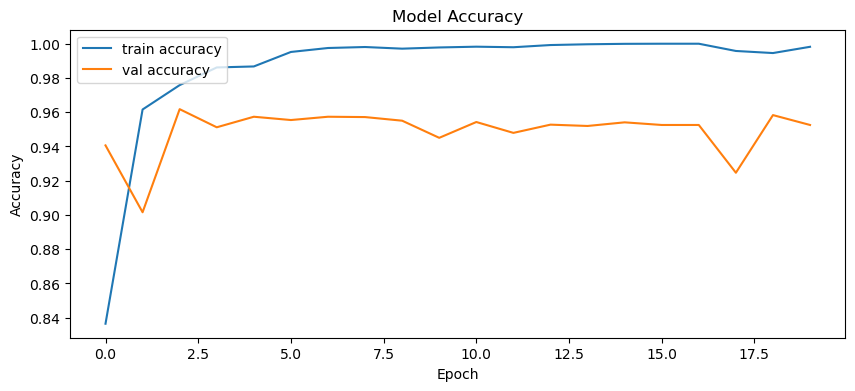

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(history.history['accuracy'], label = 'train accuracy')
ax.plot(history.history['val_accuracy'], label = 'val accuracy')

ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

In [22]:
model.save('fake_news_model.keras')

In [23]:
title="House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It"
author="Darrell Lucus"
text='''
House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emails it had recently discovered in order to see if they contained classified information. Not long after this letter went out, Oversight Committee Chairman Jason Chaffetz set the political world ablaze with this tweet. FBI Dir just informed me, ""The FBI has learned of the existence of emails that appear to be pertinent to the investigation.
'''

In [24]:
news = author + " " + title + " " + text

news_clean = clean(news)
news_onehot = one_hot(news_clean, voc_size) 
news_seq = pad_sequences([news_onehot],padding='post',maxlen=max_len)

In [25]:
from keras.models import load_model

model = load_model('fake_news_model.keras')

prediction = model.predict([news_seq])

if prediction[0] > 0.5:
    print ("Fake news !")
else:
    print ("Not fake news !")

1/1 [==============================] - 1s 850ms/step
Fake news !
